## 8_Sprint_8
### Hyphotesis Testing
#### Eloi Canals

#### Exercici 1. 
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona **un atribut** del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

### Dades.
Accedim a un dataframe de dades estadistiques de combats d'arts marcials mixtes (1993 - 2001), on tenim informació dels lluitadors, categoria, guanyador, tipus de victoria, etc.
Sobre aquestes dades plantejarem unes Hipotesis H1 que validarem o no amb un sampling sobre les dades i tests de Hipotesis testing.

Source:
https://www.kaggle.com/rajeevw/ufcdata

1. Definir Hipotesis Nul·la. Status Quo. H0

- Els lluitadors els cuals tenen un abast de braç mes llarg, tenen més probabilitat de guanyar tant per KO com per submissió (tenir llargues les extremitats serveis tant per cops al oponent i no ser colpejat, com per submissions).

"There is no getting around the fact that there are tangible benefits to height and reach advantages in MMA."

Source: https://evolve-mma.com/blog/does-a-height-and-reach-advantage-necessarily-make-you-a-better-mixed-martial-artist/


2. Definir Hipotesis H1

Ens centrarem només el el 'reach advantage' ja que en el pes, se suposa que els dos lluitadors lluiten en la mateixa categoria de pes, per que l'aventatge de pes no s'hauria de considerar.

Formulem la hipotesis H1 dient que el 'reach advantage' no es definitiu a l'hora de conseguir una victoria en MMA.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ufc_df = pd.read_csv('archive/data.csv')

ufc_df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [2]:
ufc_df.shape

(6012, 144)

In [3]:
# El dataset te moltes columnes, es fa una primera tria de les que a priori
# poden ser interessants per declarar la hipotesis.

In [4]:
with pd.option_context('display.max_columns', None):
    print (ufc_df)

          R_fighter           B_fighter        Referee        date  \
0      Adrian Yanez       Gustavo Lopez  Chris Tognoni  2021-03-20   
1      Trevin Giles       Roman Dolidze      Herb Dean  2021-03-20   
2       Tai Tuivasa     Harry Hunsucker      Herb Dean  2021-03-20   
3     Cheyanne Buys   Montserrat Conejo     Mark Smith  2021-03-20   
4     Marion Reneau       Macy Chiasson     Mark Smith  2021-03-20   
...             ...                 ...            ...         ...   
6007  Remco Pardoel  Alberta Cerra Leon  John McCarthy  1994-03-11   
6008   Orlando Wiet    Robert Lucarelli  John McCarthy  1994-03-11   
6009  Johnny Rhodes       David Levicki  John McCarthy  1994-03-11   
6010  Patrick Smith          Ray Wizard  John McCarthy  1994-03-11   
6011   Scott Morris      Sean Daugherty  John McCarthy  1994-03-11   

                    location Winner  title_bout       weight_class  B_avg_KD  \
0     Las Vegas, Nevada, USA    Red       False       Bantamweight     0.000   

In [5]:
# Reduïm les columnes del dataset
ufc_columns_mask = ['R_fighter','B_fighter','Winner','weight_class','B_total_time_fought(seconds)','B_total_rounds_fought','B_total_title_bouts','B_current_win_streak','B_current_lose_streak','B_longest_win_streak','B_wins','B_losses','B_draw','B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous','B_win_by_KO/TKO','B_win_by_Submission','B_win_by_TKO_Doctor_Stoppage','B_Stance','B_Height_cms','B_Reach_cms','B_Weight_lbs','R_total_time_fought(seconds)','R_total_rounds_fought','R_total_title_bouts','R_current_win_streak','R_current_lose_streak','R_longest_win_streak','R_wins','R_losses','R_draw','R_win_by_Decision_Majority','R_win_by_Decision_Split','R_win_by_Decision_Unanimous','R_win_by_KO/TKO','R_win_by_Submission','R_win_by_TKO_Doctor_Stoppage','R_Stance','R_Height_cms','R_Reach_cms','R_Weight_lbs','B_age','R_age']
ufc_df_sel = ufc_df[ufc_columns_mask].copy(deep=True)
ufc_df_sel

,R_fighter,B_fighter,Winner,weight_class,B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Red,Bantamweight,531.5,4,0,0,1,1,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Red,Middleweight,577.5,4,0,2,0,2,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Red,Heavyweight,NaN,0,0,0,0,0,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Blue,WomenStrawweight,NaN,0,0,0,0,0,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Blue,WomenBantamweight,764.0,11,1,3,0,3,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN
6008,Orlando Wiet,Robert Lucarelli,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN
6009,Johnny Rhodes,David Levicki,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN
6010,Patrick Smith,Ray Wizard,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0


In [8]:
ufc_df_sel.B_Reach_cms.isna().sum()

891

In [9]:
ufc_df_sel.R_Reach_cms.isna().sum()

406

In [10]:
ufc_df_sel.B_age = ufc_df_sel.B_Reach_cms.fillna(round(ufc_df_sel.B_Reach_cms.mean()))
ufc_df_sel.R_age = ufc_df_sel.R_Reach_cms.fillna(round(ufc_df_sel.R_Reach_cms.mean()))

<AxesSubplot:xlabel='B_Reach_cms', ylabel='Count'>

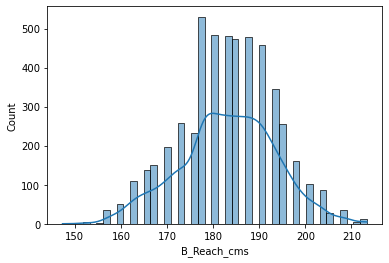

In [11]:
sns.histplot(ufc_df_sel.B_Reach_cms, kde=True)

<AxesSubplot:xlabel='R_Reach_cms', ylabel='Count'>

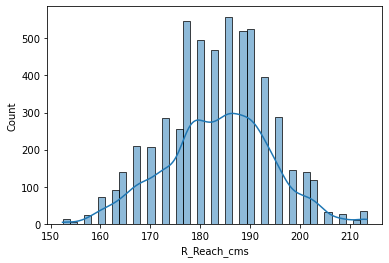

In [12]:
sns.histplot(ufc_df_sel.R_Reach_cms, kde=True)

<AxesSubplot:xlabel='B_Reach_cms', ylabel='Count'>

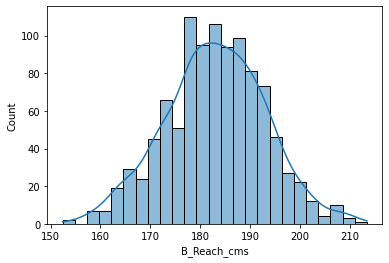

In [13]:
# Prova amb una sample
simple_random_sample = ufc_df_sel.sample(n=1200)
sns.histplot(simple_random_sample.B_Reach_cms, kde=True)

In [14]:
from scipy import stats

stat, p = stats.shapiro(simple_random_sample.B_Reach_cms)
print('Statistics=%.3f, p=%.10f' % (stat, p))

Statistics=nan, p=1.0000000000


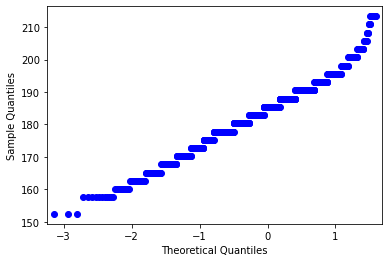

In [15]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = simple_random_sample.R_Reach_cms
# q-q plot
qqplot(data, line='s')
pyplot.show()

In [16]:
simple_random_sample.B_Reach_cms = simple_random_sample.B_Reach_cms.fillna(round(simple_random_sample.B_Reach_cms.mean()))

/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 1.2966218470308821


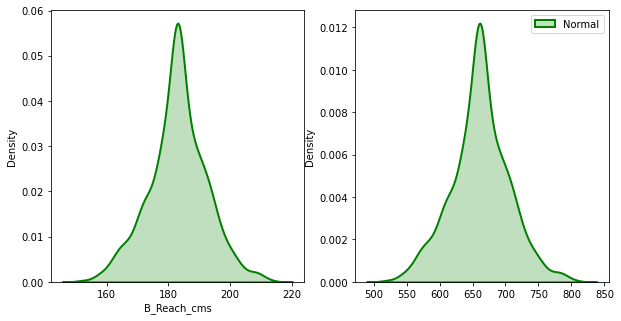

In [17]:
# Python3 code to show Box-cox Transformation
# of non-normal data

# import modules
import numpy as np
from scipy import stats

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# generate non-normal data (exponential)
original_data = simple_random_sample.B_Reach_cms

# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,
			kde_kws = {'shade': True, 'linewidth': 2},
			label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambda}")



In [18]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = simple_random_sample.B_Reach_cms
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.983, p=0.000
Probably not Gaussian


In [19]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = simple_random_sample.B_Reach_cms
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=7.522, p=0.023
Probably not Gaussian


In [20]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = simple_random_sample.B_Reach_cms
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=9.837
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [21]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = simple_random_sample.B_Reach_cms
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 9.837
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)



#### Exercici 2. 
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona **dos altres atributs** del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

#### Exercici 3. 
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona **tres atributs** del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.